# FOOD DEMAND PREDICTION

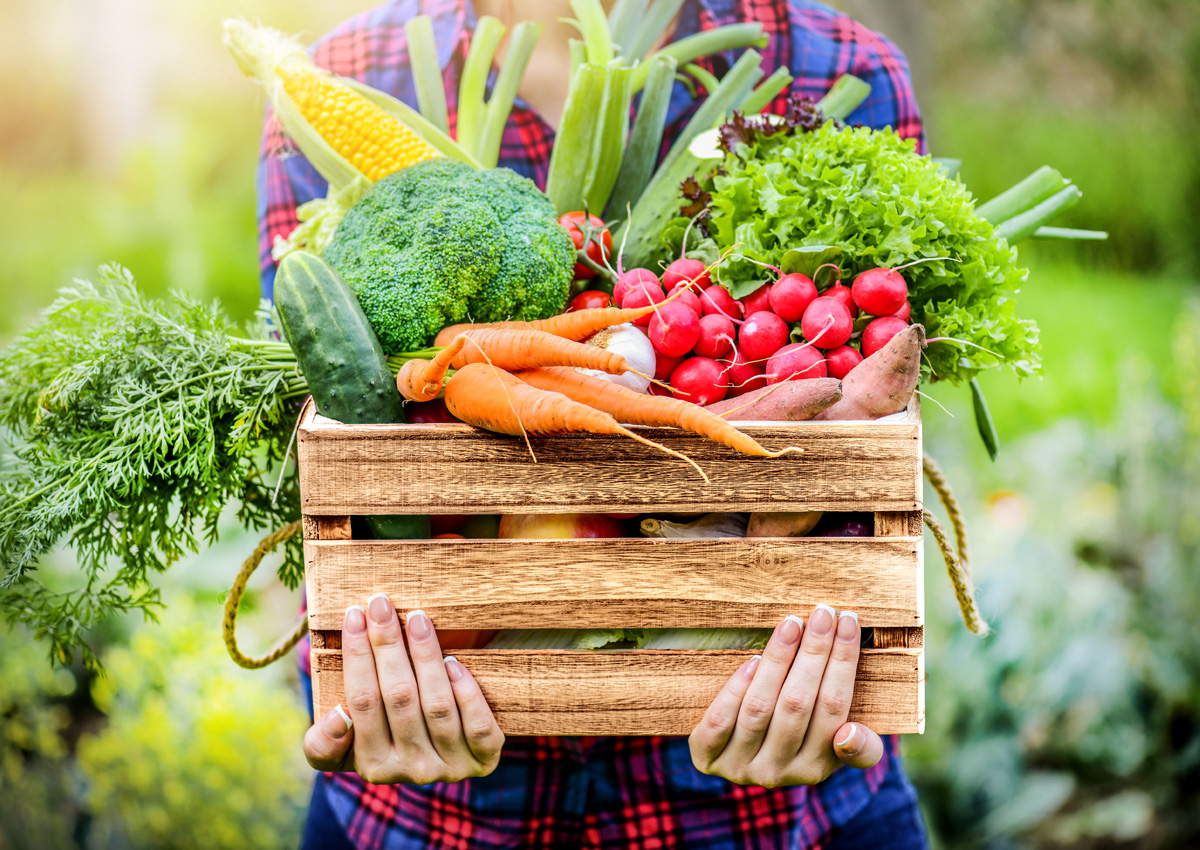

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
%matplotlib inline

## Loading Datasets

In [2]:
df_train=pd.read_csv("C:/Users/USER/Downloads/train.csv")
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
df_test=pd.read_csv(r"C:\Users\USER\Downloads\test.csv")
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [4]:
df_meals=pd.read_csv("C:/Users/USER/Downloads/meal_info.csv")
df_meals.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
df_fulfilment_centre=pd.read_csv("C:/Users/USER/Downloads/fulfilment_center_info.csv")
df_fulfilment_centre.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
df=df_test.copy()
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
train=pd.merge(df_train,df_fulfilment_centre,on='center_id')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [8]:
test=pd.merge(df,df_fulfilment_centre, on='center_id')

In [9]:
train = pd.merge(train,df_meals, on='meal_id')
test = pd.merge(test,df_meals, on='meal_id')

In [10]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


## Exploratory Data Analysis

In [11]:
train.shape

(456548, 15)

In [12]:
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [13]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [14]:
train.info

<bound method DataFrame.info of              id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
...         ...   ...        ...      ...             ...         ...   
456543  1437396   141         61     2104          583.03      630.53   
456544  1060716   142         61     2104          581.03      582.03   
456545  1029231   143         61     2104          583.03      581.03   
456546  1141147   144         61     2104          582.03      581.03   
456547  1443704   145         61     2104          581.03      582.03   

        emailer_for_promotion  homepage_featured  num_orders  city_code  \
0               

In [15]:
#df-test
df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
dtype: object

In [16]:
df['id']=df['id'].astype('int')
df['week']=df['week'].astype('int')
df['center_id']=df['center_id'].astype('int')
df['meal_id']=df['meal_id'].astype('int')
df['checkout_price']=df['checkout_price'].astype('float')
df['base_price']=df['base_price'].astype('float')

df['emailer_for_promotion']=df['emailer_for_promotion'].astype('int')
df['homepage_featured']=df['homepage_featured'].astype('int')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [17]:
final_train=train.copy()
final_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


## DATA CLEANING

In [18]:
final_train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

### Observation

It is found that given data sets has 0 null values.

{'whiskers': [<matplotlib.lines.Line2D at 0x2deac0f9dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2deac116460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2deac0f9970>],
 'medians': [<matplotlib.lines.Line2D at 0x2deac116b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2deac116f10>],
 'means': []}

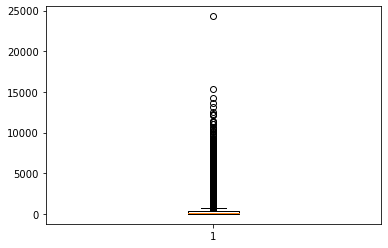

In [19]:
plt.boxplot(final_train.num_orders)

{'whiskers': [<matplotlib.lines.Line2D at 0x2deac1f8c70>,
 'caps': [<matplotlib.lines.Line2D at 0x2deac2063d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2deac1f88e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2deac206af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2deac206e80>],
 'means': []}

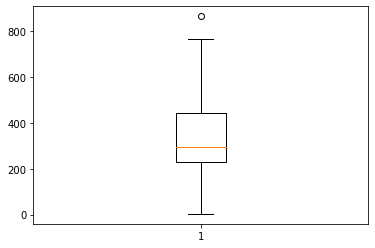

In [20]:
plt.boxplot(final_train.checkout_price)

# Observation:

Dataset contain two outliers with

1.number of orders

2.checkout price

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'week'}>,
        <AxesSubplot:title={'center':'center_id'}>],
       [<AxesSubplot:title={'center':'meal_id'}>,
        <AxesSubplot:title={'center':'checkout_price'}>,
        <AxesSubplot:title={'center':'base_price'}>],
       [<AxesSubplot:title={'center':'emailer_for_promotion'}>,
        <AxesSubplot:title={'center':'homepage_featured'}>,
        <AxesSubplot:title={'center':'num_orders'}>],
       [<AxesSubplot:title={'center':'city_code'}>,
        <AxesSubplot:title={'center':'region_code'}>,
        <AxesSubplot:title={'center':'op_area'}>]], dtype=object)

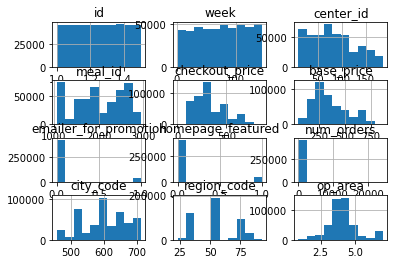

In [21]:
final_train.hist()

# Getting insights from cuisine column

In [22]:
final_train.cuisine.describe() 

count      456548
unique          4
top       Italian
freq       122925
Name: cuisine, dtype: object

In [23]:
final_train.cuisine.unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [24]:
final_train['cuisine'].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

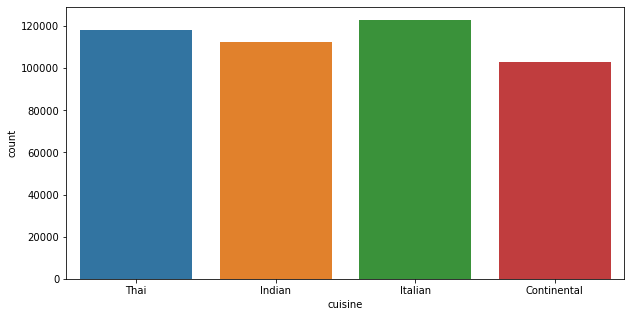

In [25]:
import seaborn as sns
plt.figure(figsize = (10,5))
x = sns.countplot(x="cuisine", data=final_train)

In [26]:
x = final_train['category'].value_counts()
x

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

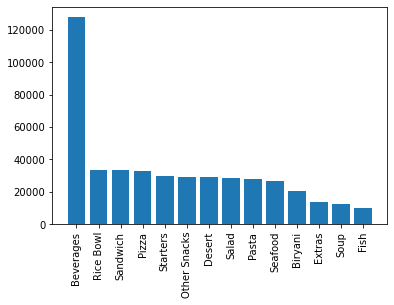

In [27]:
plt.bar(x.index,x.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='num_orders'>

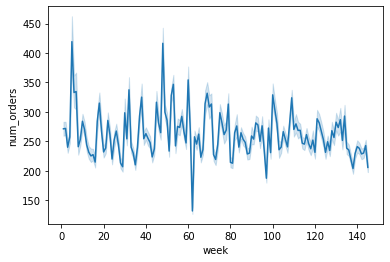

In [28]:
sn.lineplot(final_train['week'],final_train['num_orders'])

# Analysis: Over all Trend

62 week has lowest no of orders throughout.

5 and 48 week has hightest no of orders throughout.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

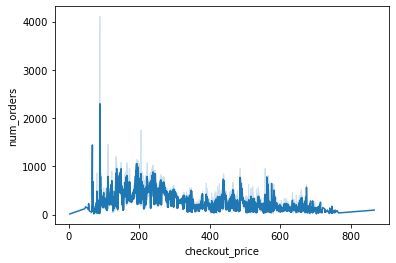

In [29]:
sn.lineplot(final_train['checkout_price'],final_train['num_orders'])

<AxesSubplot:>

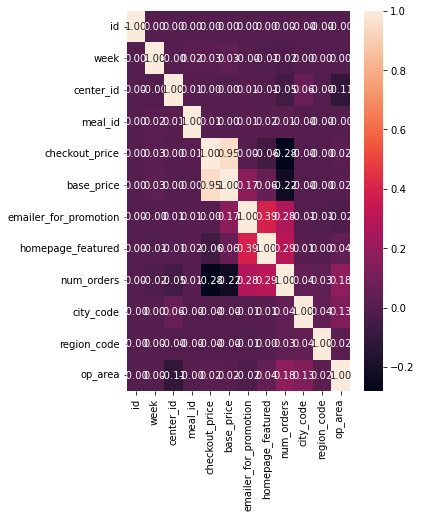

In [30]:
# Plot the linear correlation between different numerical features
plt.figure(figsize=(5,7))
corr = final_train.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

* There's an almost perfect positive correlation between checkout_price and base price, which is as expected.
* There's also a noticeable positive correlation between homepage_featured and num_of_orders.

# SCALING

* Train and test data

In [31]:
encoder=LabelEncoder()
final_train['category']=encoder.fit_transform(final_train['category'])
final_train['center_type']=encoder.fit_transform(final_train['center_type'])
final_train['cuisine']=encoder.fit_transform(final_train['cuisine'])
final_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [32]:
final_test=test.copy()
final_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [33]:
final_test['category']=encoder.fit_transform(final_test['category'])
final_test['center_type']=encoder.fit_transform(final_test['center_type'])
final_test['cuisine']=encoder.fit_transform(final_test['cuisine'])
final_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [34]:
X = final_train.drop(['num_orders'],axis=1)
y = final_train['num_orders'].values

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

# Building Model

The whole data has 456548 rows, it consists of data for 145 weeks. 
Let's train our predictive models on data for the first 130 weeks (week 1 to week 130), then validate our models for the next 10 weeks (from week 131 to week 140) and then finally test our model on the last 5 weeks (week 141 to week 145)

# 1. LINEAR REGRESSION

In [36]:
LR = LinearRegression()

In [37]:
LR.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = LR.predict(x_test)

In [39]:
y_pred[y_pred<0] = 0

In [40]:
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics

In [41]:
RMSEL=mean_squared_log_error(y_test, y_pred)

In [42]:
RMSEL=np.sqrt(RMSEL)
RMSEL

1.5663299626960892

# 2. DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
DTR = DecisionTreeRegressor()

In [45]:
DTR.fit(x_train, y_train)

DecisionTreeRegressor()

In [46]:
y_pred = DTR.predict(x_test)

In [51]:
y_pred

array([ 94.,  94., 123., ..., 555.,  81., 352.])

In [48]:
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics

In [49]:
RMSEL=mean_squared_log_error(y_test, y_pred)

In [50]:
RMSEL=np.sqrt(RMSEL)
RMSEL

0.656068246851034

# 3. XG BOOST

In [52]:
from xgboost import XGBRegressor

In [53]:
XG = XGBRegressor()

In [54]:
XG.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
y_pred = XG.predict(x_test)

In [56]:
y_pred

array([197.4324 , 129.93309,  30.12818, ..., 278.05576,  69.82012,
       232.73361], dtype=float32)

In [58]:
RMSEL=np.sqrt(RMSEL)
print(RMSEL)

0.8099803990536031


# 4. GRADIENT BOOSTING

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
GB = GradientBoostingRegressor()

In [61]:
GB.fit(x_train, y_train)

GradientBoostingRegressor()

In [62]:
y_pred = GB.predict(x_test)

In [63]:
y_pred

array([371.81185466, 108.18222001,  79.6952685 , ..., 317.92174328,
        26.49583815, 113.92826325])

In [64]:
y_pred[y_pred<0] = 0

In [65]:
RMSEL=mean_squared_log_error(y_test, y_pred)

In [66]:
RMSEL=np.sqrt(RMSEL)
RMSEL

1.0201562030130353

# 5. RANDOM FOREST

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
RF = RandomForestRegressor()

In [69]:
RF.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = RF.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_pred[y_pred<0] = 0

In [ ]:
RMSEL=mean_squared_log_error(y_test, y_pred)

In [39]:
RMSEL=np.sqrt(RMSEL)
RMSEL

0.4935304013610275

In [40]:
test_pred = final_test.drop(columns=['id','center_id','meal_id','week','checkout_price','base_price','center_type'],axis=1)
test_pred .head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,3
4,0,0,647,56,2.0,0,3


In [41]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [42]:
pred_test_data= RF.predict(final_test)
pred_test_data[pred_test_data<0] = 0
submit = pd.DataFrame({
    'id' :final_test['id'],
    'num_orders' : pred_test_data
})

In [43]:
submit.head()

,id,num_orders
0,1028232,128.52
1,1262649,111.41
2,1453211,97.91
3,1262599,115.15
4,1495848,148.29
